<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/synth%20ver%201.1/out-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/out-good.csv?token=AKVFSOAHZ5RD2RJ6EWGULRS6X54TM"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/out-mal.csv?token=AKVFSOGUQIZ3HTTKMQYVYKK6X54TQ"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl, nrows=30146)

Characteristics of Dataset

In [51]:
dfg

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,router_0,router_1,router_2,router_3,router_7,router_11,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,11,2,0,1,4,2,5,0,0,31,15,1,0,0,0,0,0,0,6,0,0.000000,4,164,1,164,164,26896,0,4,10,1
1,15,2,4,1,4,2,5,0,0,31,15,0,1,0,0,0,0,0,6,1,0.166667,8,163,2,164,326,53464,8,4,10,1
2,19,2,4,1,4,2,5,0,0,31,15,0,0,1,0,0,0,0,6,2,0.333333,12,162,3,164,486,79704,8,4,10,1
3,22,2,0,1,4,2,6,0,0,31,15,1,0,0,0,0,0,0,6,0,0.000000,4,161,4,164,644,105616,0,4,12,1
4,23,1,4,1,4,2,5,0,0,31,15,0,0,0,1,0,0,0,6,3,0.500000,16,160,5,164,800,131200,4,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,9918,2,4,4,2,3,10,0,0,31,15,0,0,1,0,0,0,0,6,2,0.333333,16,5,44,48,220,10560,8,8,30,1
16499,9918,1,3,4,2,3,9,0,0,31,15,0,0,0,0,1,0,0,6,4,0.666667,23,4,45,48,180,8640,3,8,27,1
16500,9918,1,3,1,4,2,5,0,0,31,15,0,0,0,0,0,1,0,6,5,0.833333,24,3,46,48,138,6624,3,4,10,1
16501,9918,1,4,5,3,3,9,0,0,31,15,0,0,0,1,0,0,0,6,3,0.500000,23,2,47,48,94,4512,4,15,27,1


In [52]:
dfm

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,7,2,0,1,4,2,5,9,9,31,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0.000000,4,646,1,646,646,417316,0,4,10,0
1,7,1,0,1,4,2,5,11,11,31,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.000000,4,645,2,646,1290,833340,0,4,10,0
2,8,1,0,1,4,2,6,11,11,31,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.000000,4,644,3,646,1932,1248072,0,4,12,0
3,9,1,0,1,4,2,7,11,11,31,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.000000,4,643,4,646,2572,1661512,0,4,14,0
4,9,2,0,1,1,3,9,9,9,31,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0.000000,4,642,5,646,3210,2073660,0,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30141,9917,0,0,2,2,3,9,15,15,31,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,9,149,52,200,7748,1549600,0,4,27,0
30142,9917,2,0,1,4,2,7,12,12,31,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0.000000,4,148,53,200,7844,1568800,0,4,14,0
30143,9917,2,4,1,4,1,1,12,12,31,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0.333333,8,147,54,200,7938,1587600,8,4,1,0
30144,9918,2,0,1,4,2,8,10,10,31,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0.000000,377,146,55,200,8030,1606000,0,4,16,0


In [0]:
df = dfm.append(dfg, ignore_index=True,sort=False)

In [54]:
df.isnull().sum()

timestamp                 0
outport                   0
inport                    0
flit_id                   0
flit_type                 0
vnet                      0
vc                        0
src_ni                    0
src_router                0
dst_ni                    0
dst_router                0
router_0                  0
router_1                  0
router_2                  0
router_3                  0
router_4              16503
router_5              16503
router_6              16503
router_7                  0
router_8              16503
router_9              16503
router_10             16503
router_11                 0
router_12             16503
router_13             16503
router_14             16503
router_15                 0
hop_count                 0
current_hop               0
hop_percentage            0
enqueue_time              0
packet_count_decr         0
packet_count_incr         0
max_packet_count          0
packet_count_index        0
packet_max_index    

In [0]:
df = df.fillna(0)

In [56]:
df.isnull().sum()

timestamp             0
outport               0
inport                0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
router_0              0
router_1              0
router_2              0
router_3              0
router_4              0
router_5              0
router_6              0
router_7              0
router_8              0
router_9              0
router_10             0
router_11             0
router_12             0
router_13             0
router_14             0
router_15             0
hop_count             0
current_hop           0
hop_percentage        0
enqueue_time          0
packet_count_decr     0
packet_count_incr     0
max_packet_count      0
packet_count_index    0
packet_max_index      0
port_index            0
flit_index            0
vnet_vc_index         0
target                0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('out-model.csv',index=False)

In [58]:
df = pd.read_csv("out-model.csv")
df

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,7,2,0,1,4,2,5,9,9,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,4,0,0.000000,4,646,1,646,646,417316,0,4,10,0
1,7,1,0,1,4,2,5,11,11,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,645,2,646,1290,833340,0,4,10,0
2,8,1,0,1,4,2,6,11,11,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,644,3,646,1932,1248072,0,4,12,0
3,9,1,0,1,4,2,7,11,11,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,643,4,646,2572,1661512,0,4,14,0
4,9,2,0,1,1,3,9,9,9,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,4,0,0.000000,4,642,5,646,3210,2073660,0,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,9918,2,0,1,4,2,8,10,10,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,2,0,0.000000,377,146,55,200,8030,1606000,0,4,16,0
46645,9918,1,4,5,3,3,9,0,0,31,15,0,0,0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6,3,0.500000,23,2,47,48,94,4512,4,15,27,1
46646,9918,0,3,3,2,3,10,7,7,31,15,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,2,2,1.000000,620,145,56,200,8120,1624000,0,6,30,0
46647,9918,2,4,4,2,3,10,0,0,31,15,0,0,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6,2,0.333333,16,5,44,48,220,10560,8,8,30,1


In [59]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router','src_ni','dst_ni','dst_router'])
train_X

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
0,2,0,1,4,2,5,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,4,0,0.000000,4,646,1,646,646,417316,0,4,10
1,1,0,1,4,2,5,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,645,2,646,1290,833340,0,4,10
2,1,0,1,4,2,6,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,644,3,646,1932,1248072,0,4,12
3,1,0,1,4,2,7,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,1,0,0.000000,4,643,4,646,2572,1661512,0,4,14
4,2,0,1,1,3,9,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,4,0,0.000000,4,642,5,646,3210,2073660,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,2,0,1,4,2,8,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,2,0,0.000000,377,146,55,200,8030,1606000,0,4,16
46645,1,4,5,3,3,9,0,0,0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6,3,0.500000,23,2,47,48,94,4512,4,15,27
46646,0,3,3,2,3,10,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,2,2,1.000000,620,145,56,200,8120,1624000,0,6,30
46647,2,4,4,2,3,10,0,0,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6,2,0.333333,16,5,44,48,220,10560,8,8,30


In [60]:
train_X.corr()

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
outport,1.000000,-0.110668,0.001530,-0.003192,-0.005233,-0.028475,0.278625,0.307709,0.334957,-0.042007,0.037060,0.047959,0.053237,-0.047223,0.125294,0.135646,0.177690,-0.057068,0.158107,0.219466,0.271447,-0.837472,0.314870,-0.451542,-0.658517,-0.047482,-0.012987,-0.059562,-0.080246,-0.024947,0.008077,0.563022,0.000034,-0.011059
inport,-0.110668,1.000000,-0.002656,0.004710,-0.013716,-0.081169,-0.387935,0.123101,0.154651,0.154567,-0.051600,-0.014512,0.010888,-0.015301,-0.174449,0.052938,-0.025803,0.047061,-0.220135,-0.057037,0.014170,0.033314,0.356832,0.526147,0.626406,0.059334,-0.058646,-0.078657,-0.151843,-0.085755,-0.067156,0.656024,-0.000705,-0.051585
flit_id,0.001530,-0.002656,1.000000,-0.455531,0.659505,0.627918,0.094870,0.063584,0.033394,0.006501,0.015372,0.017136,0.024071,0.003013,-0.053641,-0.047882,-0.035903,-0.013846,-0.027755,-0.059512,-0.070153,0.001164,0.159430,0.085035,-0.030499,0.109109,-0.098803,-0.096748,-0.216246,-0.107212,-0.063682,0.040432,0.897283,0.687613
flit_type,-0.003192,0.004710,-0.455531,1.000000,-0.827704,-0.788531,-0.119140,-0.078883,-0.042182,-0.008172,-0.019151,-0.021334,-0.029998,-0.003448,0.065131,0.059153,0.043695,0.018065,0.033719,0.074591,0.087532,-0.000731,-0.198898,-0.104750,0.039654,-0.116848,0.102154,0.132041,0.258993,0.125711,0.067769,-0.050363,-0.063335,-0.863391
vnet,-0.005233,-0.013716,0.659505,-0.827704,1.000000,0.959475,0.109252,0.066287,0.029507,0.002219,0.019970,0.018952,0.027730,0.001227,-0.069951,-0.061763,-0.043859,-0.017519,-0.025720,-0.060682,-0.069541,0.010809,0.158407,0.083150,-0.039554,0.115227,-0.108643,-0.130389,-0.264339,-0.128855,-0.071114,0.036706,0.372474,0.975173
vc,-0.028475,-0.081169,0.627918,-0.788531,0.959475,1.000000,0.156441,0.038494,-0.006284,-0.020090,0.024661,0.020846,0.031445,-0.030650,-0.067511,-0.080320,0.007345,-0.053358,0.002237,-0.060095,-0.063112,0.065565,0.091495,0.030638,-0.045646,0.139102,-0.087816,-0.100022,-0.207723,-0.096754,-0.050688,-0.046690,0.354363,0.979264
router_0,0.278625,-0.387935,0.094870,-0.119140,0.109252,0.156441,1.000000,-0.065638,-0.071450,-0.078744,-0.007905,-0.010230,-0.011356,-0.088522,-0.026727,-0.028935,-0.037903,-0.106977,-0.033726,-0.046815,-0.057903,-0.145523,0.250016,-0.266752,-0.304448,-0.058212,-0.070516,-0.107128,-0.196460,-0.120198,-0.083871,-0.212368,0.053513,0.155537
router_1,0.307709,0.123101,0.063584,-0.078883,0.066287,0.038494,-0.065638,1.000000,-0.078908,-0.086963,-0.008731,-0.011298,-0.012541,-0.097762,-0.029517,-0.031955,-0.041860,-0.118143,-0.037246,-0.051701,-0.063947,-0.160714,0.251702,-0.172199,-0.238527,-0.049606,-0.056982,-0.077458,-0.148677,-0.081831,-0.053592,0.341914,0.036422,0.056544
router_2,0.334957,0.154651,0.033394,-0.042182,0.029507,-0.006284,-0.071450,-0.078908,1.000000,-0.094664,-0.009504,-0.012299,-0.013652,-0.106419,-0.032130,-0.034785,-0.045566,-0.128605,-0.040545,-0.056280,-0.069609,-0.174945,0.233500,-0.069282,-0.161458,-0.038874,-0.054374,-0.054492,-0.120389,-0.066677,-0.047577,0.393773,0.018680,0.014114
router_3,-0.042007,0.154567,0.006501,-0.008172,0.002219,-0.020090,-0.078744,-0.086963,-0.094664,1.000000,-0.010474,-0.013554,-0.015046,-0.117282,-0.035410,-0.038336,-0.050218,-0.141733,-0.044683,-0.062025,-0.076715,-0.192803,0.186598,0.025597,-0.085023,-0.032587,-0.039282,-0.040190,-0.087884,-0.049247,-0.038029,0.068008,0.003643,-0.009777


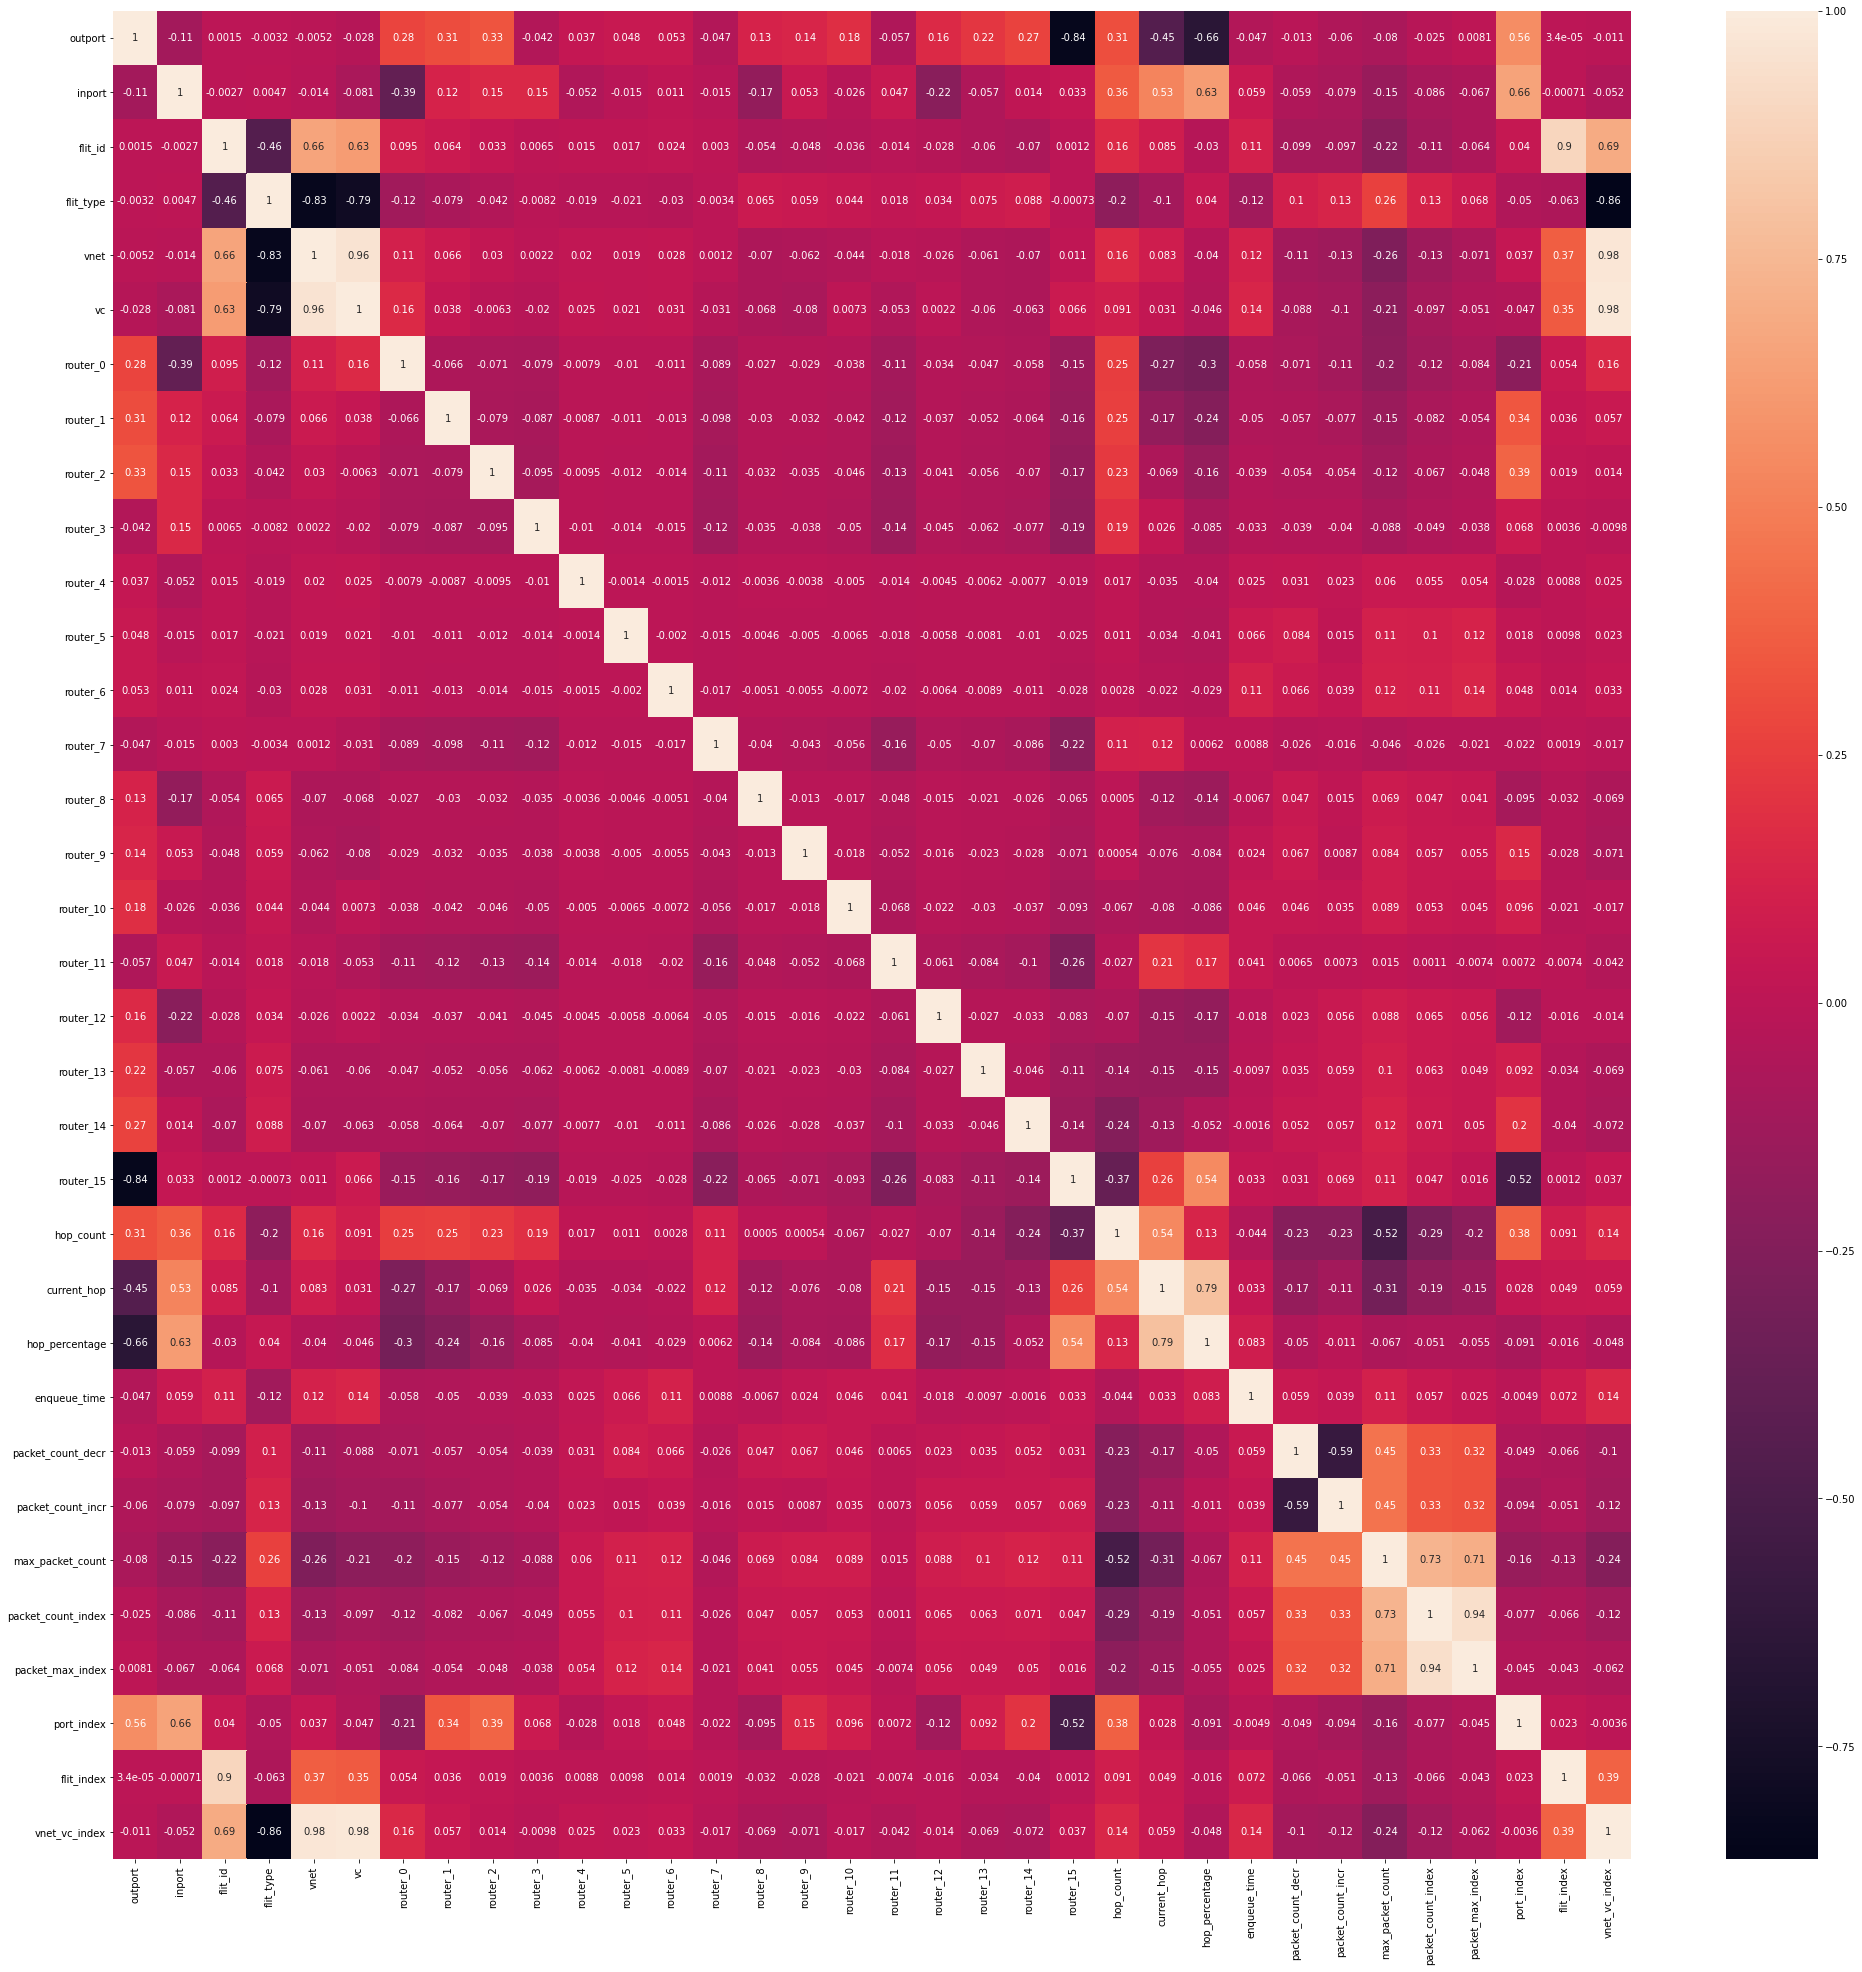

In [61]:
plt.figure(figsize=(34,34))
sns.heatmap(train_X.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [62]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index
0,1.0,0.00,0.00,1.000000,0.5,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.005717,0.006139,0.0,0.214286,0.257143
1,0.5,0.00,0.00,1.000000,0.5,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.998450,0.001550,1.000000,0.011873,0.012293,0.0,0.214286,0.257143
2,0.5,0.00,0.00,1.000000,0.5,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.996899,0.003101,1.000000,0.018011,0.018428,0.0,0.214286,0.314286
3,0.5,0.00,0.00,1.000000,0.5,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.995349,0.004651,1.000000,0.024129,0.024543,0.0,0.214286,0.371429
4,1.0,0.00,0.00,0.000000,1.0,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.993798,0.006202,1.000000,0.030228,0.030640,0.0,0.000000,0.742857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,1.0,0.00,0.00,1.000000,0.5,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.038943,0.224806,0.083721,0.254181,0.076307,0.023722,0.0,0.214286,0.428571
46645,0.5,1.00,1.00,0.666667,1.0,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.500000,0.500000,0.001984,0.001550,0.071318,0.000000,0.000440,0.000033,0.5,1.000000,0.742857
46646,0.0,0.75,0.50,0.333333,1.0,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.333333,1.000000,0.064314,0.223256,0.085271,0.254181,0.077167,0.023989,0.0,0.357143,0.828571
46647,1.0,1.00,0.75,0.333333,1.0,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.333333,0.333333,0.001253,0.006202,0.066667,0.000000,0.001644,0.000122,1.0,0.500000,0.828571


In [63]:
train_X[train_X.duplicated()].shape

(49, 34)

In [64]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,flit_id,flit_type,vnet,vc,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
outport,1.000000,-0.110668,0.001530,-0.003192,-0.005233,-0.028475,0.278625,0.307709,0.334957,-0.042007,0.037060,0.047959,0.053237,-0.047223,0.125294,0.135646,0.177690,-0.057068,0.158107,0.219466,0.271447,-0.837472,0.314870,-0.451542,-0.658517,-0.047482,-0.012987,-0.059562,-0.080246,-0.024947,0.008077,0.563022,0.000034,-0.011059,0.174061
inport,-0.110668,1.000000,-0.002656,0.004710,-0.013716,-0.081169,-0.387935,0.123101,0.154651,0.154567,-0.051600,-0.014512,0.010888,-0.015301,-0.174449,0.052938,-0.025803,0.047061,-0.220135,-0.057037,0.014170,0.033314,0.356832,0.526147,0.626406,0.059334,-0.058646,-0.078657,-0.151843,-0.085755,-0.067156,0.656024,-0.000705,-0.051585,0.204652
flit_id,0.001530,-0.002656,1.000000,-0.455531,0.659505,0.627918,0.094870,0.063584,0.033394,0.006501,0.015372,0.017136,0.024071,0.003013,-0.053641,-0.047882,-0.035903,-0.013846,-0.027755,-0.059512,-0.070153,0.001164,0.159430,0.085035,-0.030499,0.109109,-0.098803,-0.096748,-0.216246,-0.107212,-0.063682,0.040432,0.897283,0.687613,0.356041
flit_type,-0.003192,0.004710,-0.455531,1.000000,-0.827704,-0.788531,-0.119140,-0.078883,-0.042182,-0.008172,-0.019151,-0.021334,-0.029998,-0.003448,0.065131,0.059153,0.043695,0.018065,0.033719,0.074591,0.087532,-0.000731,-0.198898,-0.104750,0.039654,-0.116848,0.102154,0.132041,0.258993,0.125711,0.067769,-0.050363,-0.063335,-0.863391,-0.443845
vnet,-0.005233,-0.013716,0.659505,-0.827704,1.000000,0.959475,0.109252,0.066287,0.029507,0.002219,0.019970,0.018952,0.027730,0.001227,-0.069951,-0.061763,-0.043859,-0.017519,-0.025720,-0.060682,-0.069541,0.010809,0.158407,0.083150,-0.039554,0.115227,-0.108643,-0.130389,-0.264339,-0.128855,-0.071114,0.036706,0.372474,0.975173,0.440940
vc,-0.028475,-0.081169,0.627918,-0.788531,0.959475,1.000000,0.156441,0.038494,-0.006284,-0.020090,0.024661,0.020846,0.031445,-0.030650,-0.067511,-0.080320,0.007345,-0.053358,0.002237,-0.060095,-0.063112,0.065565,0.091495,0.030638,-0.045646,0.139102,-0.087816,-0.100022,-0.207723,-0.096754,-0.050688,-0.046690,0.354363,0.979264,0.367861
router_0,0.278625,-0.387935,0.094870,-0.119140,0.109252,0.156441,1.000000,-0.065638,-0.071450,-0.078744,-0.007905,-0.010230,-0.011356,-0.088522,-0.026727,-0.028935,-0.037903,-0.106977,-0.033726,-0.046815,-0.057903,-0.145523,0.250016,-0.266752,-0.304448,-0.058212,-0.070516,-0.107128,-0.196460,-0.120198,-0.083871,-0.212368,0.053513,0.155537,0.280009
router_1,0.307709,0.123101,0.063584,-0.078883,0.066287,0.038494,-0.065638,1.000000,-0.078908,-0.086963,-0.008731,-0.011298,-0.012541,-0.097762,-0.029517,-0.031955,-0.041860,-0.118143,-0.037246,-0.051701,-0.063947,-0.160714,0.251702,-0.172199,-0.238527,-0.049606,-0.056982,-0.077458,-0.148677,-0.081831,-0.053592,0.341914,0.036422,0.056544,0.222804
router_2,0.334957,0.154651,0.033394,-0.042182,0.029507,-0.006284,-0.071450,-0.078908,1.000000,-0.094664,-0.009504,-0.012299,-0.013652,-0.106419,-0.032130,-0.034785,-0.045566,-0.128605,-0.040545,-0.056280,-0.069609,-0.174945,0.233500,-0.069282,-0.161458,-0.038874,-0.054374,-0.054492,-0.120389,-0.066677,-0.047577,0.393773,0.018680,0.014114,0.175348
router_3,-0.042007,0.154567,0.006501,-0.008172,0.002219,-0.020090,-0.078744,-0.086963,-0.094664,1.000000,-0.010474,-0.013554,-0.015046,-0.117282,-0.035410,-0.038336,-0.050218,-0.141733,-0.044683,-0.062025,-0.076715,-0.192803,0.186598,0.025597,-0.085023,-0.032587,-0.039282,-0.040190,-0.087884,-0.049247,-0.038029,0.068008,0.003643,-0.009777,0.122313


Principal Component Analysis

In [65]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.34689876, -0.60988607,  0.8446661 , ...,  0.73614375,
        -0.50561165, -0.04446093],
       [-0.43342667, -0.25650876,  0.91927505, ...,  0.47185017,
        -0.5243276 , -0.0391278 ],
       [-0.3715927 , -0.24923648,  0.92784322, ...,  0.48458689,
        -0.51282905, -0.01448251],
       ...,
       [ 0.75095387,  1.19630914,  0.15737243, ..., -0.05988091,
        -0.11125985,  0.04145541],
       [ 1.12258848, -0.67658414, -0.67300268, ..., -0.2213993 ,
        -0.04882287,  0.06648118],
       [ 1.1563519 , -0.76984845, -0.51632555, ..., -0.20057207,
        -0.01197718,  0.15724259]])

In [66]:
pca.explained_variance_ratio_

array([0.22962879, 0.2001941 , 0.14974547, 0.06811387, 0.0567514 ,
       0.04430806, 0.04406946, 0.03950917, 0.03002518, 0.02561476,
       0.01651949, 0.01511114, 0.01275134, 0.01245291, 0.01059454])

Text(0, 0.5, 'Variance')

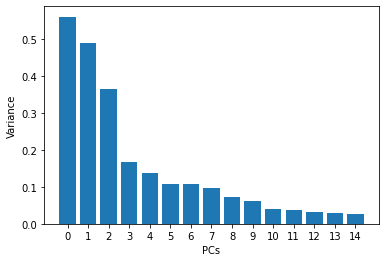

In [67]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [68]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.346899,-0.609886,0.844666,0.008650,0.012266,-0.054025,-0.017646,-0.030415,-0.012523,0.048796,0.157719,0.037452,0.736144,-0.505612,-0.044461
1,-0.433427,-0.256509,0.919275,0.849175,-0.519378,0.030599,0.147054,0.171309,-0.047882,-0.267624,0.003844,-0.165065,0.471850,-0.524328,-0.039128
2,-0.371593,-0.249236,0.927843,0.848189,-0.527637,0.021776,0.157647,0.175642,-0.049490,-0.259748,0.012231,-0.164487,0.484587,-0.512829,-0.014483
3,-0.309758,-0.241964,0.936410,0.847203,-0.535894,0.012952,0.168238,0.179974,-0.051097,-0.251873,0.020616,-0.163912,0.497311,-0.501336,0.010172
4,0.669076,-0.519768,0.902984,0.017155,-0.068466,-0.630226,0.335766,0.034810,-0.032372,0.033465,0.145758,0.067799,0.749158,-0.504103,-0.292323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,-0.135891,-0.562774,0.925438,0.002314,-0.052443,-0.068207,0.032722,-0.019958,-0.024221,0.105907,0.107534,0.178730,0.277694,-0.037413,0.908698
46645,1.004719,-0.067407,-0.536945,-0.102188,0.281963,0.542788,-0.789607,0.758096,-0.083047,0.037250,-0.063389,0.000204,-0.214776,-0.050831,0.136379
46646,0.750954,1.196309,0.157372,-0.238859,-0.227768,-0.006287,0.087696,-0.005150,0.002539,0.024012,0.032524,-0.116157,-0.059881,-0.111260,0.041455
46647,1.122588,-0.676584,-0.673003,-0.393445,-0.169720,0.139323,-0.148521,-0.385610,-0.623582,-0.245481,-0.134068,-0.030065,-0.221399,-0.048823,0.066481


In [69]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,1.000000e+00,6.686548e-16,-1.403081e-16,4.260709e-17,3.702513e-16,-2.162665e-16,-2.062785e-16,1.150966e-18,-3.501205e-16,-1.921819e-16,4.271855e-16,7.244790e-16,-4.132579e-16,-2.852854e-18,-1.035635e-16,0.515953
1,6.686548e-16,1.000000e+00,1.228505e-15,-1.830645e-15,-9.869144e-16,-1.183715e-16,-7.246008e-16,-4.502080e-16,2.271846e-15,-1.349488e-15,-1.131289e-15,-5.374344e-16,-2.418731e-16,-1.572031e-16,8.885577e-17,-0.131562
2,-1.403081e-16,1.228505e-15,1.000000e+00,-4.985084e-17,2.702122e-16,1.721948e-16,-2.818301e-16,-8.633395e-17,-9.791508e-17,5.174192e-16,3.089012e-16,-1.671113e-16,-3.265158e-16,1.277361e-16,-2.352847e-16,-0.379622
3,4.260709e-17,-1.830645e-15,-4.985084e-17,1.000000e+00,8.183887e-17,8.177812e-18,3.541251e-16,-5.703728e-16,4.005020e-17,6.524655e-17,-5.352134e-17,-1.399287e-16,1.076819e-16,-3.764609e-17,2.582296e-16,0.035008
4,3.702513e-16,-9.869144e-16,2.702122e-16,8.183887e-17,1.000000e+00,-1.691233e-16,-4.559302e-17,-3.826929e-16,1.734248e-16,9.721450e-17,5.730093e-16,3.177169e-16,6.750119e-16,3.916766e-17,-2.358153e-16,0.388375
5,-2.162665e-16,-1.183715e-16,1.721948e-16,8.177812e-18,-1.691233e-16,1.000000e+00,-7.611869e-16,-7.129162e-16,4.284244e-17,5.030098e-16,-6.025605e-16,3.364870e-16,5.075546e-16,-1.239941e-16,2.776636e-16,-0.162909
6,-2.062785e-16,-7.246008e-16,-2.818301e-16,3.541251e-16,-4.559302e-17,-7.611869e-16,1.000000e+00,-4.801083e-16,1.604625e-16,2.270768e-16,8.182692e-16,4.720471e-17,-6.425057e-16,6.287992e-17,-9.316070e-17,-0.276522
7,1.150966e-18,-4.502080e-16,-8.633395e-17,-5.703728e-16,-3.826929e-16,-7.129162e-16,-4.801083e-16,1.000000e+00,5.444090e-16,-5.768993e-17,-4.836236e-16,-3.104093e-17,-2.817663e-16,-8.956088e-17,3.725173e-16,-0.202597
8,-3.501205e-16,2.271846e-15,-9.791508e-17,4.005020e-17,1.734248e-16,4.284244e-17,1.604625e-16,5.444090e-16,1.000000e+00,-2.953549e-16,2.042718e-16,2.716202e-16,-3.459003e-16,9.364499e-17,-1.849481e-17,0.063469
9,-1.921819e-16,-1.349488e-15,5.174192e-16,6.524655e-17,9.721450e-17,5.030098e-16,2.270768e-16,-5.768993e-17,-2.953549e-16,1.000000e+00,-6.324701e-17,5.578690e-16,3.254221e-16,-9.514728e-17,-2.082050e-16,-0.013885


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

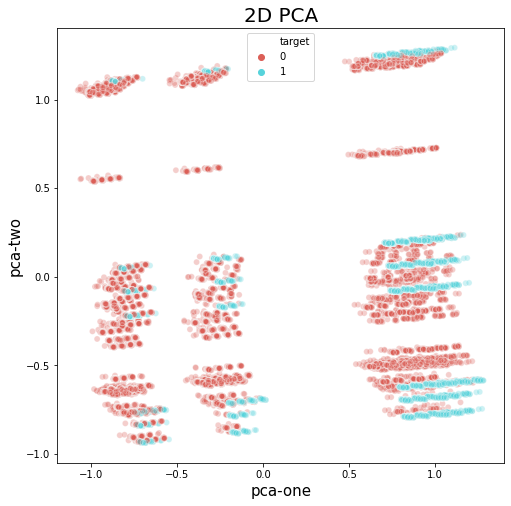

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

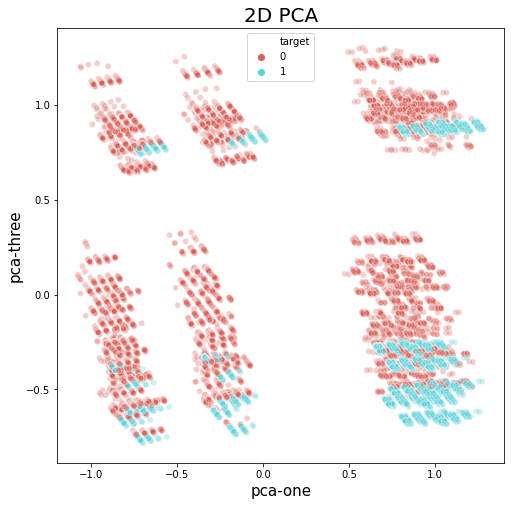

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

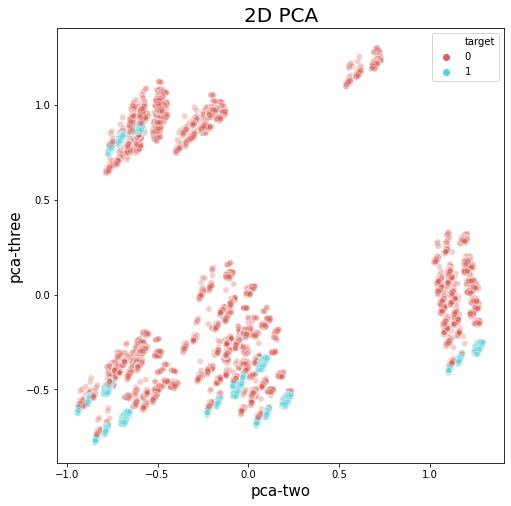

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

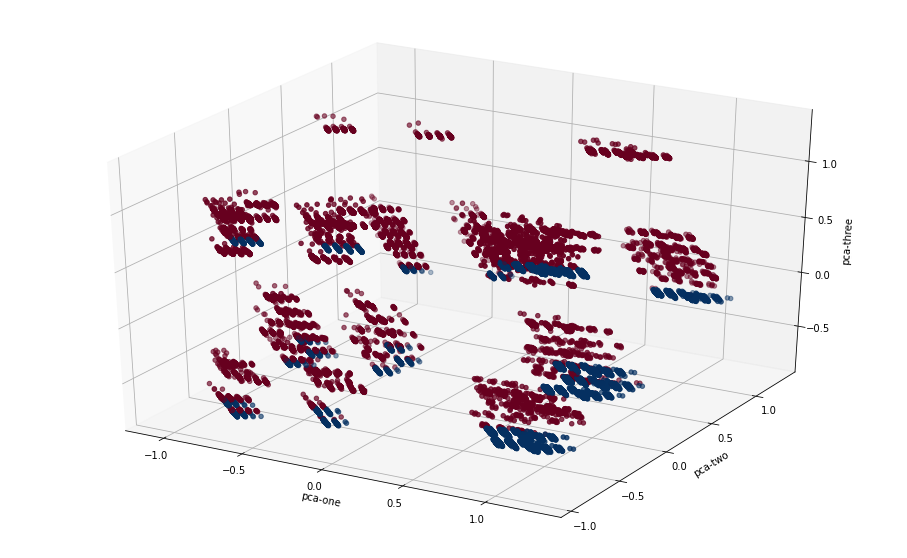

In [74]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

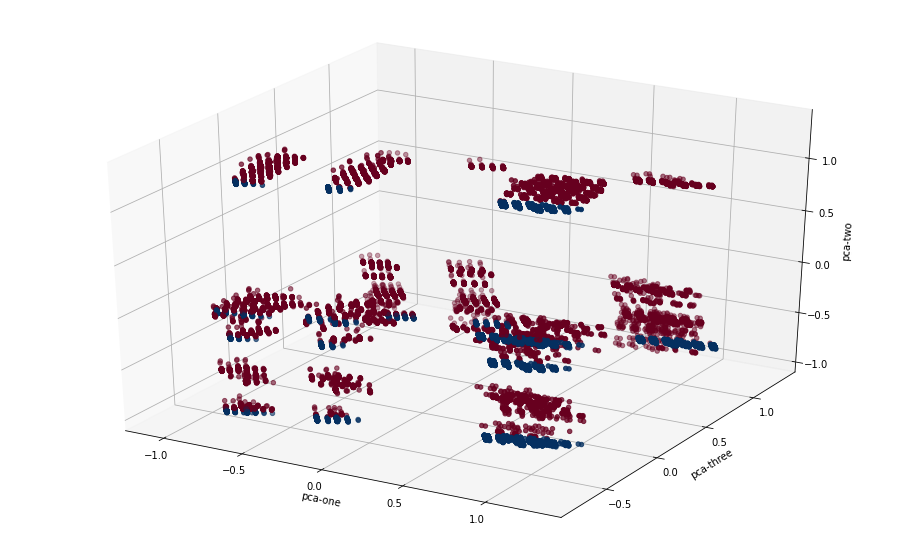

In [75]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

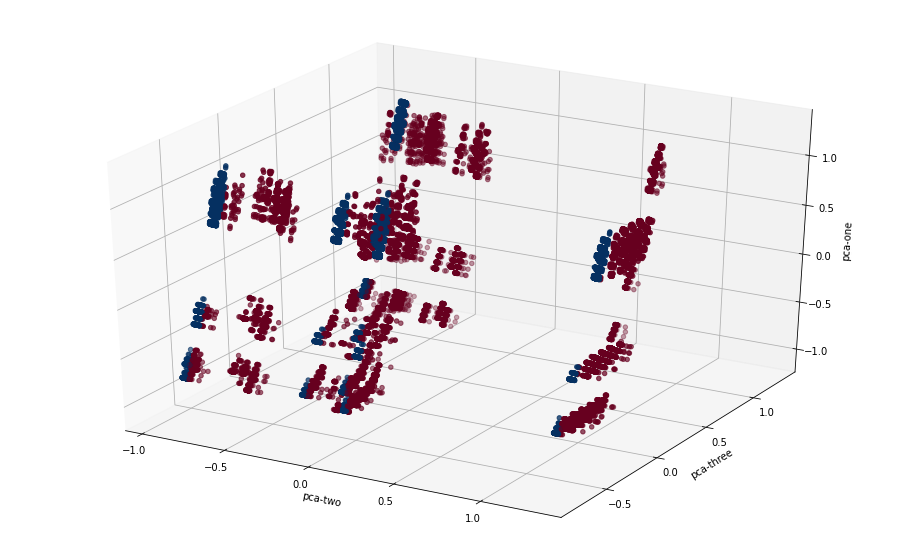

In [76]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [77]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 170.02938723564148 seconds


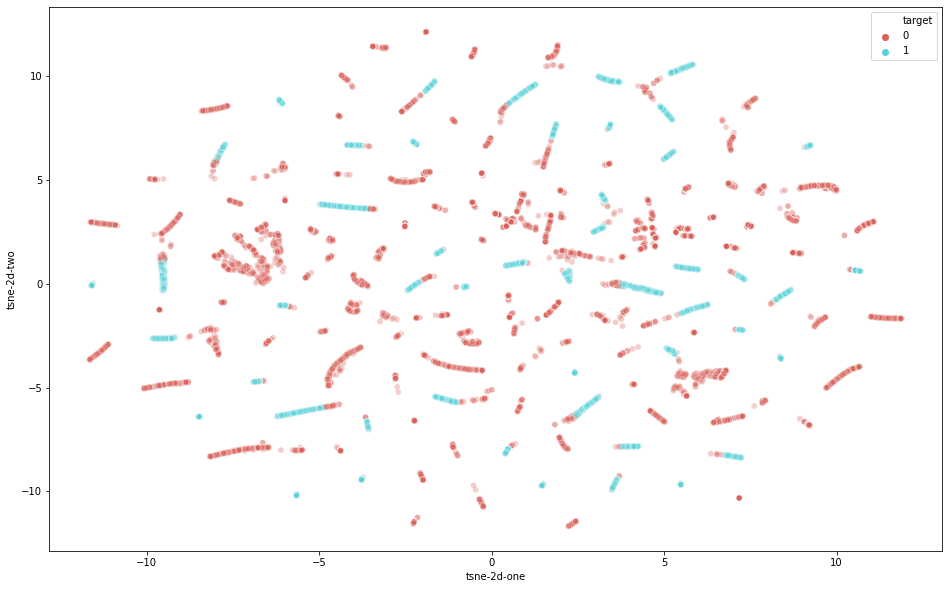

In [78]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

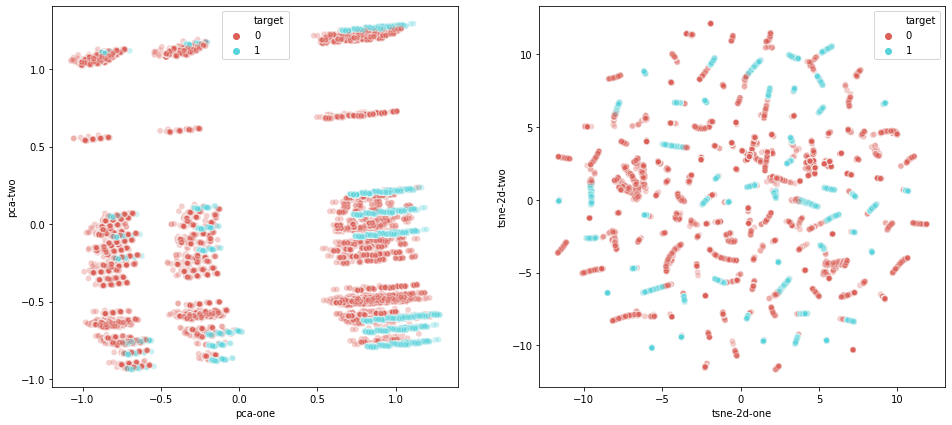

In [79]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [80]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 145.823383808136 seconds


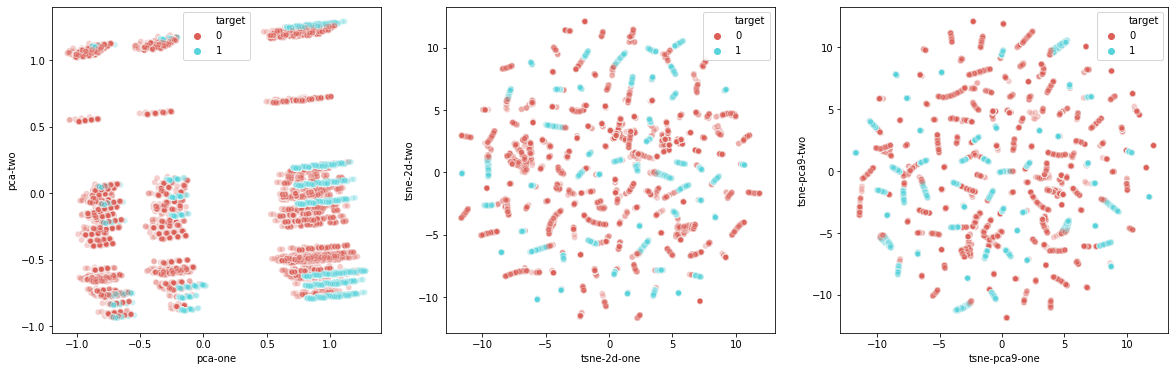

In [81]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [83]:
train_Y = df['target']
train_Y.value_counts()

0    30146
1    16503
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
22           hop_count  3448.033124
6             router_0  2751.858396
2              flit_id  2646.621334
4                 vnet  2498.104090
33       vnet_vc_index  1910.343399
23         current_hop  1788.773882
7             router_1  1734.902258
3            flit_type  1244.942078
5                   vc  1102.004520
20           router_14  1087.050902
21           router_15  1082.196017
8             router_2  1047.953276
31          port_index  1024.871869
28    max_packet_count  1012.807411
19           router_13   730.182452
29  packet_count_index   664.496706
30    packet_max_index   546.768773


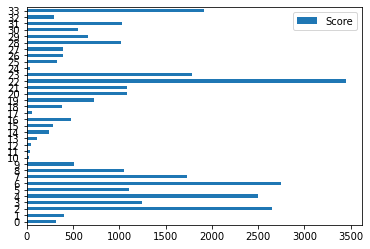

In [86]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [90]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 99.7347195798387
Test Prediction  99.68917470525187


In [92]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
22,hop_count,17.630376
23,current_hop,10.774278
6,router_0,6.192275
4,vnet,5.092258
0,outport,3.285625
7,router_1,2.908368
31,port_index,2.028614
9,router_3,1.376391
24,hop_percentage,1.165529
33,vnet_vc_index,0.813184


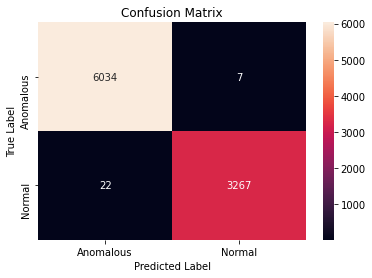

In [93]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      0.99      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



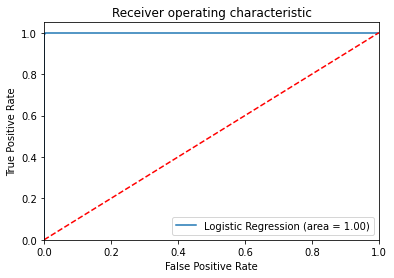

In [95]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [96]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [98]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 99.5846619684343
Test Prediction  99.39978563772776


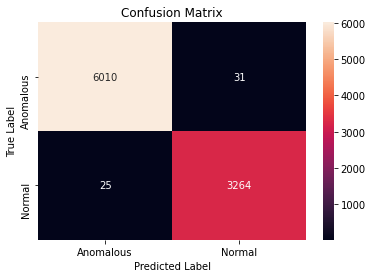

In [99]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [100]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6041
           1       0.99      0.99      0.99      3289

    accuracy                           0.99      9330
   macro avg       0.99      0.99      0.99      9330
weighted avg       0.99      0.99      0.99      9330



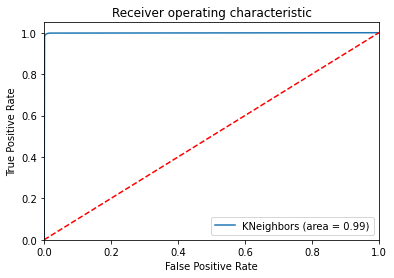

In [101]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [103]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [105]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 98.56641389104746
Test Prediction Score 98.69239013933547


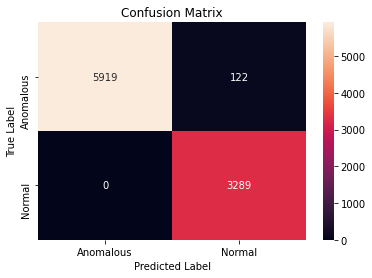

In [106]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [107]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6041
           1       0.96      1.00      0.98      3289

    accuracy                           0.99      9330
   macro avg       0.98      0.99      0.99      9330
weighted avg       0.99      0.99      0.99      9330



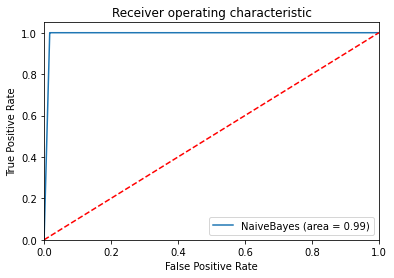

In [108]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [109]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [110]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 29855 samples, validate on 7464 samples
Epoch 1/10
29855/29855 [==============================] - 1s 44us/step - loss: 0.1069 - accuracy: 0.9086 - val_loss: 0.0308 - val_accuracy: 0.9883
Epoch 2/10
29855/29855 [==============================] - 1s 36us/step - loss: 0.0189 - accuracy: 0.9913 - val_loss: 0.0138 - val_accuracy: 0.9954
Epoch 3/10
29855/29855 [==============================] - 1s 36us/step - loss: 0.0105 - accuracy: 0.9945 - val_loss: 0.0092 - val_accuracy: 0.9953
Epoch 4/10
29855/29855 [==============================] - 1s 36us/step - loss: 0.0077 - accuracy: 0.9954 - val_loss: 0.0077 - val_accuracy: 0.9960
Epoch 5/10
29855/29855 [==============================] - 1s 37us/step - loss: 0.0062 - accuracy: 0.9957 - val_loss: 0.0061 - val_accuracy: 0.9962
Epoch 6/10
29855/29855 [==============================] - 1s 37us/step - loss: 0.0053 - accuracy: 0.9960 - val_loss: 0.0054 - val_accuracy: 0.9969
Epoch 7/10
29855/29855 [==============================] - 1s 36us/ste

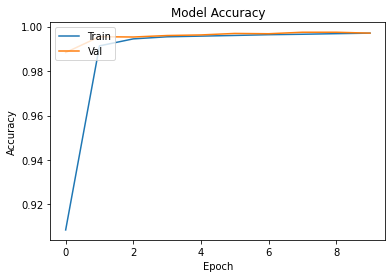

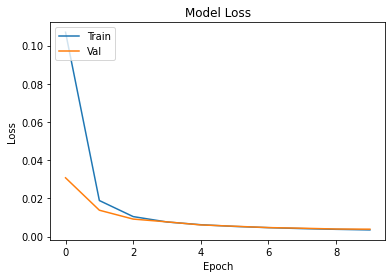

In [111]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [112]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.73%


3-Layer Neural Network

In [113]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 29855 samples, validate on 7464 samples
Epoch 1/15
29855/29855 [==============================] - 1s 37us/step - loss: 0.2327 - accuracy: 0.6179 - val_loss: 0.2204 - val_accuracy: 0.6442
Epoch 2/15
29855/29855 [==============================] - 1s 35us/step - loss: 0.2089 - accuracy: 0.6464 - val_loss: 0.1955 - val_accuracy: 0.6442
Epoch 3/15
29855/29855 [==============================] - 1s 35us/step - loss: 0.1745 - accuracy: 0.6464 - val_loss: 0.1517 - val_accuracy: 0.6442
Epoch 4/15
29855/29855 [==============================] - 1s 35us/step - loss: 0.1260 - accuracy: 0.8581 - val_loss: 0.1019 - val_accuracy: 0.9124
Epoch 5/15
29855/29855 [==============================] - 1s 35us/step - loss: 0.0820 - accuracy: 0.9508 - val_loss: 0.0663 - val_accuracy: 0.9775
Epoch 6/15
29855/29855 [==============================] - 1s 35us/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0467 - val_accuracy: 0.9887
Epoch 7/15
29855/29855 [==============================] - 1s 35us/ste

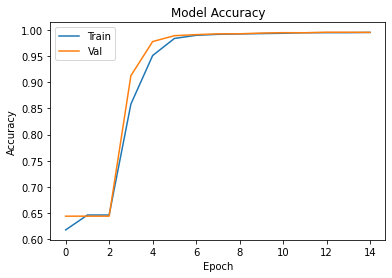

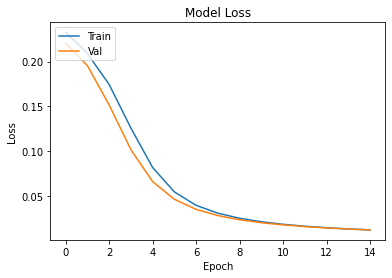

In [114]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [115]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.39%


4-Layer Neural Network



In [116]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 29855 samples, validate on 7464 samples
Epoch 1/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.2204 - accuracy: 0.6464 - val_loss: 0.1946 - val_accuracy: 0.6442
Epoch 2/30
29855/29855 [==============================] - 1s 37us/step - loss: 0.1621 - accuracy: 0.7177 - val_loss: 0.1302 - val_accuracy: 0.8915
Epoch 3/30
29855/29855 [==============================] - 1s 37us/step - loss: 0.1012 - accuracy: 0.9311 - val_loss: 0.0771 - val_accuracy: 0.9680
Epoch 4/30
29855/29855 [==============================] - 1s 37us/step - loss: 0.0606 - accuracy: 0.9837 - val_loss: 0.0488 - val_accuracy: 0.9873
Epoch 5/30
29855/29855 [==============================] - 1s 37us/step - loss: 0.0405 - accuracy: 0.9904 - val_loss: 0.0348 - val_accuracy: 0.9933
Epoch 6/30
29855/29855 [==============================] - 1s 37us/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.0269 - val_accuracy: 0.9942
Epoch 7/30
29855/29855 [==============================] - 1s 37us/ste

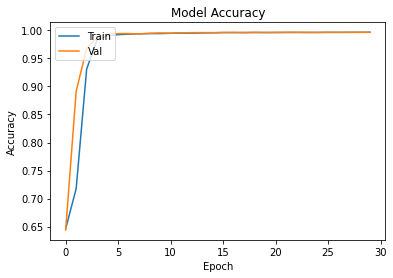

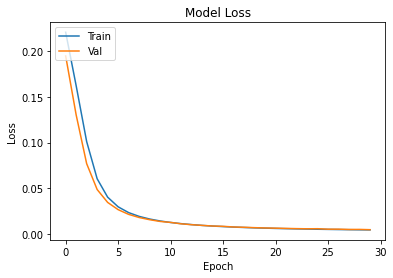

In [117]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [118]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.58%


5-Layer Neural Network Optimized

In [119]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 29855 samples, validate on 7464 samples
Epoch 1/100
29855/29855 [==============================] - 2s 82us/step - loss: 0.0242 - accuracy: 0.9718 - val_loss: 0.0060 - val_accuracy: 0.9928
Epoch 2/100
29855/29855 [==============================] - 2s 65us/step - loss: 0.0093 - accuracy: 0.9878 - val_loss: 0.0040 - val_accuracy: 0.9950
Epoch 3/100
29855/29855 [==============================] - 2s 65us/step - loss: 0.0075 - accuracy: 0.9911 - val_loss: 0.0044 - val_accuracy: 0.9949
Epoch 4/100
29855/29855 [==============================] - 2s 65us/step - loss: 0.0059 - accuracy: 0.9929 - val_loss: 0.0065 - val_accuracy: 0.9920
Epoch 5/100
29855/29855 [==============================] - 2s 66us/step - loss: 0.0048 - accuracy: 0.9938 - val_loss: 0.0036 - val_accuracy: 0.9954
Epoch 6/100
29855/29855 [==============================] - 2s 65us/step - loss: 0.0055 - accuracy: 0.9931 - val_loss: 0.0033 - val_accuracy: 0.9965
Epoch 7/100
29855/29855 [==============================] - 2s 6

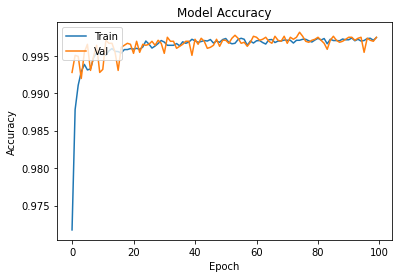

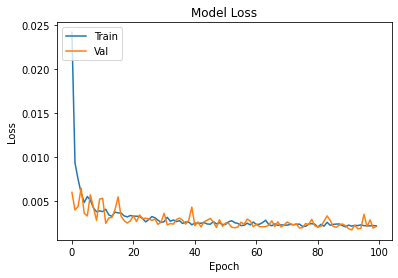

In [120]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [121]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.69%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [124]:
# GridSearchCV
param_grid={'max_depth':range(0,33,2) ,
            'max_features':range(0,33,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 26}
Accuracy : 0.999866021425715


In [128]:
dt = DecisionTreeClassifier(max_depth=33,max_features=33,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=33, max_features=33, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [130]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.978563772776


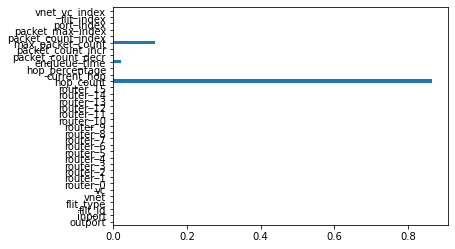

In [131]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

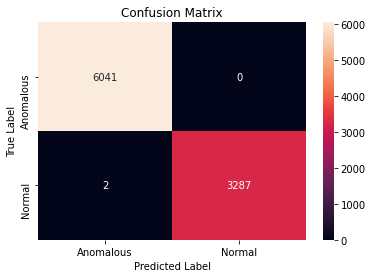

In [132]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



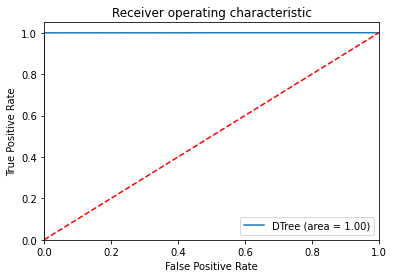

In [134]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [136]:
rf = RandomForestClassifier(max_depth=33,max_features=33,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=33, max_features=33,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [138]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 100.0


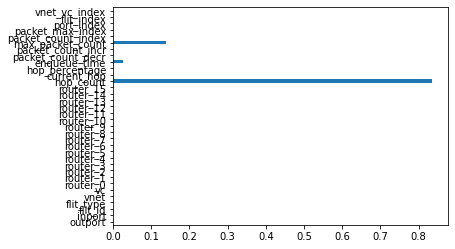

In [139]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

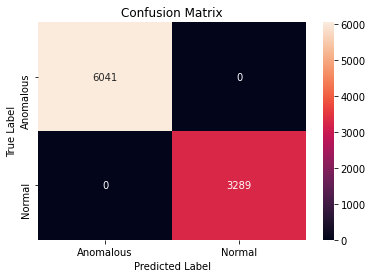

In [140]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [141]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



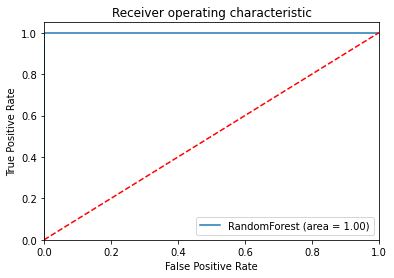

In [142]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [144]:
xgbc = XGBClassifier(max_depth=33,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=33,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [146]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.978563772776


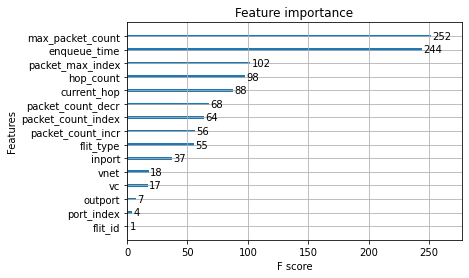

In [147]:
plot_importance(xgbc)
plt.show()

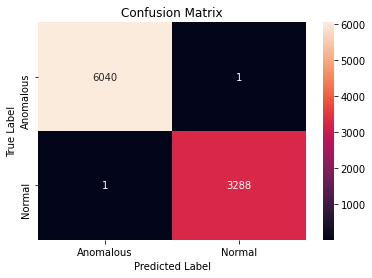

In [148]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [149]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



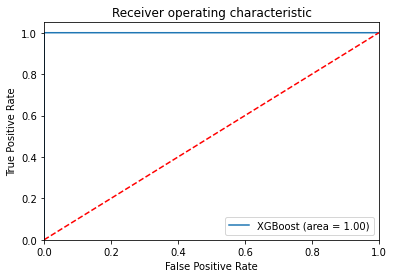

In [150]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [152]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 33, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=33,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [154]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.989281886388


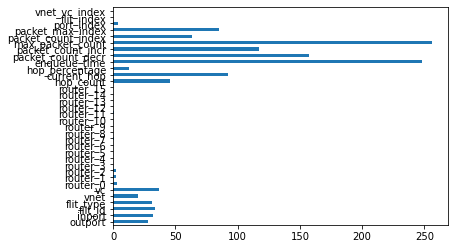

In [155]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

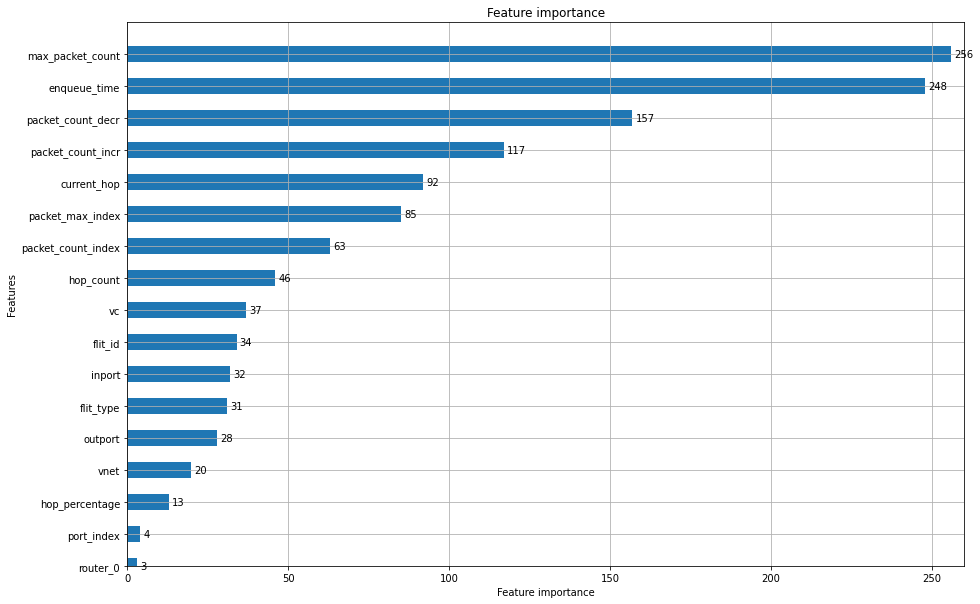

In [157]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,260), ylim = (0,17), figsize = (15,10))
plt.show()

In [158]:
sorted(gbm.feature_importances_,reverse=True)

[256,
 248,
 157,
 117,
 92,
 85,
 63,
 46,
 37,
 34,
 32,
 31,
 28,
 20,
 13,
 4,
 3,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

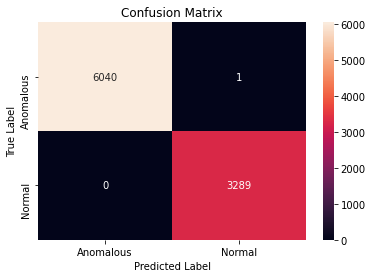

In [159]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



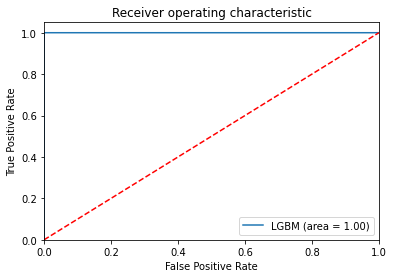

In [161]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()